<a href="https://colab.research.google.com/github/ferreirabruno7/machine_learning/blob/master/Mira_Sudan_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#acess drive file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer




In [ ]:
#import dataset
mira = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mira_sudan/mira_sudan_live_stack.csv", delimiter = ',', decimal=',', encoding='utf-8')
mira.head()

,form.household.hh_id_,form.household.village,cattle_owned,sheep_owned,goats_owned,donkeys_owned,chickens_owned,poultry_owned,cattle_eat,goatssheep_eat,poultry_eat,Income,land_crops
0,_mubarak_hara_07OXVD,Haraza,0,0,0,0,0,0,0,0,0,crop farming,sorghum
1,_mubarak_hara_DKMJ1U,Haraza,0,0,0,0,0,0,0,0,0,crop farming,21
2,_mubarak_hara_DKMJ1U,Haraza,0,0,0,0,0,0,0,0,0,crop farming,millet
3,_mubarak_hara_DKMJ1U,Haraza,0,0,0,0,0,0,0,0,0,crop farming,peanut
4,_mubarak_hara_KD6ANK,Haraza,0,0,0,0,0,0,0,0,0,crop farming,21


In [ ]:
#describe variable
mira.describe()

,cattle_owned,sheep_owned,goats_owned,donkeys_owned,chickens_owned,poultry_owned,cattle_eat,goatssheep_eat,poultry_eat
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.843537,1.778912,2.013605,0.969388,1.527211,0.136054,0.874150,1.935374,1.360544
std,2.631395,5.341137,3.606945,1.267505,2.955461,1.646755,2.151548,3.004986,1.898250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,2.000000,4.000000
max,25.000000,50.000000,15.000000,5.000000,14.000000,20.000000,8.000000,8.000000,4.000000


In [ ]:
#check correlation
cov = mira.cov() *250
cov

<ipython-input-48-197a35fe8cf0>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov = mira.cov() *250


,cattle_owned,sheep_owned,goats_owned,donkeys_owned,chickens_owned,poultry_owned,cattle_eat,goatssheep_eat,poultry_eat
cattle_owned,1731.060342,1645.759328,724.936732,278.661977,349.190871,5.340020,687.893246,226.132432,125.072555
sheep_owned,1645.759328,7131.936222,936.761394,774.752734,1081.287293,-26.584012,423.907618,388.054027,942.351002
goats_owned,724.936732,936.761394,3252.513292,692.084001,1703.832045,272.573193,912.545564,1144.418518,845.185856
donkeys_owned,278.661977,774.752734,692.084001,401.642056,559.509299,69.304172,253.299784,502.916696,409.765271
chickens_owned,349.190871,1081.287293,1703.832045,559.509299,2183.687980,50.265840,380.978501,444.553760,1011.190824
poultry_owned,5.340020,-26.584012,272.573193,69.304172,50.265840,677.950361,38.424926,2.205660,90.083815
cattle_eat,687.893246,423.907618,912.545564,253.299784,380.978501,38.424926,1157.289708,520.997307,152.167352
goatssheep_eat,226.132432,388.054027,1144.418518,502.916696,444.553760,2.205660,520.997307,2257.484735,445.264795
poultry_eat,125.072555,942.351002,845.185856,409.765271,1011.190824,90.083815,152.167352,445.264795,900.838151


In [ ]:
crr = mira.corr()

<ipython-input-49-47653b1bdf88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crr = mira.corr()


Text(0.5, 1.0, 'Correlation of variables')

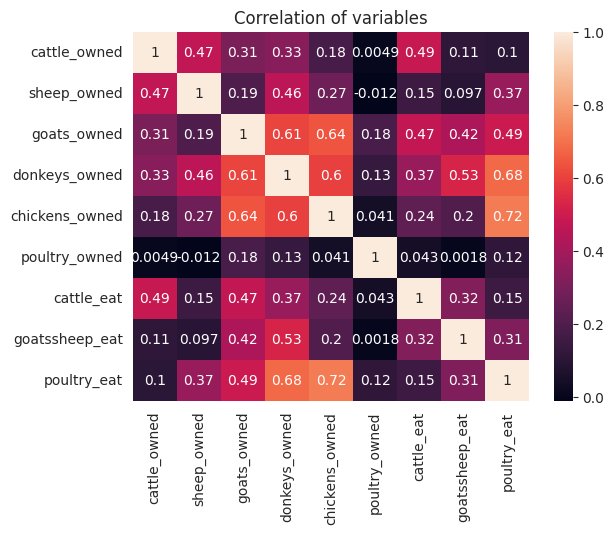

In [ ]:
sns.heatmap(crr, annot=True)
plt.title('Correlation of variables')

In [ ]:
#define X Valeus
X = mira[[
    'cattle_owned',
    'sheep_owned',
    'goats_owned',
    'donkeys_owned',
    'chickens_owned',
    'poultry_owned',
]]

In [ ]:
# Select columns at positions 2, 3, 4, 5, 6, and 7 from the 'mira' DataFrame

cols = mira.iloc[:, [2,3,4,5,6,7]].columns


In [ ]:
#normalize data
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

scaled.head()

,cattle_owned,sheep_owned,goats_owned,donkeys_owned,chickens_owned,poultry_owned
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#function score
def neg_inertia_score(estimator, X):
    return -estimator.inertia_

neg_inertia_scorer = make_scorer(neg_inertia_score)


In [ ]:
#create kmeans


kmeans = KMeans(random_state=42)

#Define parameters
param_grid = {
    'n_clusters': range(2, 3),
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500, 1000],
    'n_init': [10, 20, 30],
    'algorithm': ['auto', 'full', 'elkan']
}

# Create Hiperparameters
grid_search = GridSearchCV(
    kmeans,
    param_grid,
    scoring=neg_inertia_scorer,
    n_jobs=-1,
    cv=5,
    verbose=1
)



In [ ]:
# execute
grid_search.fit(scaled)

print('Best:', grid_search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best: {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [ ]:
#fit model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 550, n_init = 15, random_state = 1)


In [ ]:
kmeans.fit(X)

KMeans(max_iter=550, n_clusters=3, n_init=15, random_state=1)

In [ ]:
rotulos = kmeans.fit_predict(X)

In [ ]:
# look cluster
mira['cluster'] = kmeans.labels_
grouped = mira.groupby('cluster')
stacked = pd.DataFrame()
for group in grouped:
    means = group[1].mean(axis = 0)
    del means['cluster']
    stacked[group[0]] = means
print(stacked)


                       0         1     2
cattle_owned    3.733333  0.242915  10.0
sheep_owned     7.711111  0.307692  50.0
goats_owned     7.666667  1.000000   0.0
donkeys_owned   2.288889  0.704453   4.0
chickens_owned  5.044444  0.882591   2.0
poultry_owned   0.888889  0.000000   0.0
cattle_eat      3.222222  0.445344   1.0
goatssheep_eat  3.311111  1.692308   1.0
poultry_eat     3.022222  1.036437   4.0


<ipython-input-75-4f60b0de9f81>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = group[1].mean(axis = 0)
<ipython-input-75-4f60b0de9f81>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = group[1].mean(axis = 0)
<ipython-input-75-4f60b0de9f81>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

In [ ]:
#accuracy of model/
silhouette_avg = silhouette_score(X, kmeans.labels_)
print('silhueta media:', silhouette_avg)

silhueta media: 0.6774451076334613


In [ ]:
#percentual of clusters
mira['cluster'].value_counts(normalize=True)

1    0.840136
0    0.153061
2    0.006803
Name: cluster, dtype: float64

In [ ]:
#total frequency eat
mira['total_eat'] = mira['cattle_eat'] + mira['goatssheep_eat'] + mira['poultry_eat']

In [ ]:
#total of livestock
mira['total_live_stock'] = mira['cattle_owned'] + mira['sheep_owned'] + mira['goats_owned'] + mira['donkeys_owned'] + mira['chickens_owned']+ mira['poultry_owned']

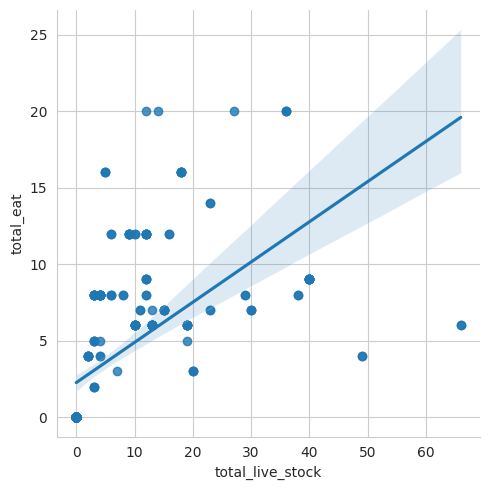

In [ ]:
#sccater plot

sns.lmplot(x='total_live_stock',y='total_eat',data=mira)

In [ ]:
#model of regression, defining x and y

y = mira['total_eat']
x = [['cattle_owned', 'sheep_owned', 'goats_owned', 'donkeys_owned', 'chickens_owned', 'poultry_owned']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.004167   -0.04316172  0.48820692  2.12027552 -0.02064088 -0.2122209 ]


In [ ]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

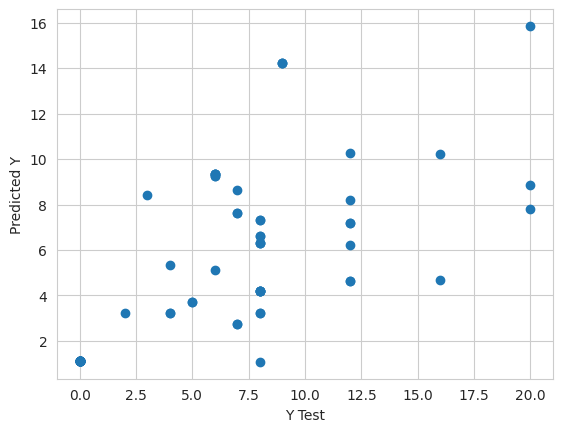

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.576543874783288
MSE: 12.478353185248531
RMSE: 3.5324712575261716


In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
cattle_owned,-0.004167
sheep_owned,-0.043162
goats_owned,0.488207
donkeys_owned,2.120276
chickens_owned,-0.020641
poultry_owned,-0.212221


Holding all other variables constant, a 1 unit increase in the number of goats

1.   Item da lista
2.   Item da lista

owned is associated with a 0.48 increase in total eats

Holding all other variables constant, an increase of 1 unit in the number of donkeys owned is associated with an increase of 2.12 total eats

In [ ]:
mira


,form.household.hh_id_,form.household.village,cattle_owned,sheep_owned,goats_owned,donkeys_owned,chickens_owned,poultry_owned,cattle_eat,goatssheep_eat,poultry_eat,Income,land_crops,cluster,total_ead,total_eat,total_live_stock
0,_mubarak_hara_07OXVD,Haraza,0,0,0,0,0,0,0,0,0,crop farming,sorghum,1,0,0,0
1,_mubarak_hara_DKMJ1U,Haraza,0,0,0,0,0,0,0,0,0,crop farming,21,1,0,0,0
2,_mubarak_hara_DKMJ1U,Haraza,0,0,0,0,0,0,0,0,0,crop farming,millet,1,0,0,0
3,_mubarak_hara_DKMJ1U,Haraza,0,0,0,0,0,0,0,0,0,crop farming,peanut,1,0,0,0
4,_mubarak_hara_KD6ANK,Haraza,0,0,0,0,0,0,0,0,0,crop farming,21,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,_randa_talga_SO6WZI,Talga_Shabaan,8,0,0,0,0,0,8,0,0,crop farming,sorghum,1,8,8,8
290,Umoshosho_ahmed_umos_NB0Q5Z,Umoshosho,10,50,0,4,2,0,1,1,4,business,millet,2,6,6,66
291,Umoshosho_ahmed_umos_NB0Q5Z,Umoshosho,10,50,0,4,2,0,1,1,4,livestock farming,millet,2,6,6,66
292,Hajar_Abied_ahmed_hajar_356PBV,Hajar_Abied,25,15,6,3,0,0,2,2,0,business,millet,0,4,4,49


In [ ]:
mira.to_csv('/content/drive/My Drive/Colab Notebooks/mira_sudan/mira_clusters.csv')
